<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/computer-vision/3_Data_Augumentation_Cats_vs_Dogs_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this exercise we will be working with the Dogs vs Cats dataset available in Kaggle. Do login to your Kaggle account (and if you dont have one then you can create it easily). Download your Kaggle API keys to local system and then continue here. Step 1: upload API keys to colab environment

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
# Change access to your Kaggle API so only current account has access to read/write
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:14<00:00, 83.0MB/s]
100% 812M/812M [00:14<00:00, 59.1MB/s]


In [7]:
!unzip --qq dogs-vs-cats.zip

In [8]:
!unzip --qq train.zip

In [9]:
!unzip --qq test1.zip

In [10]:
import os, shutil, pathlib

In [11]:
original_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_vs_dogs")

In [12]:
def create_folder_structure(name, start_index, end_index):

  for category in ("cat", "dog"):

    dir=new_dir / name / category
    os.makedirs(dir)

    file_names = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

    for files in file_names:
      shutil.copyfile(src=original_dir / files, dst=dir / files)

In [13]:
create_folder_structure("train", start_index=0,end_index = 1000)
create_folder_structure("validation", start_index=1000, end_index=1500)
create_folder_structure("test", start_index=1500, end_index=2500 )

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [15]:
def getmodel():

  inputs = keras.Input(shape=(180, 180, 3))

  #rescale the image to 1 - 255
  x = layers.Rescaling(scale=1./255)(inputs)

  x = layers.Conv2D(filters=32, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=64, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=128, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=256, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=256, activation="relu", kernel_size=3) (x)
  
  x = layers.Flatten()(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  model = keras.Model(inputs, outputs)

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [16]:
model = getmodel()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [31]:
from keras import utils
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
train_dataset = image_dataset_from_directory(new_dir / "train", batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.


In [19]:
validation_dataset = image_dataset_from_directory(new_dir / "validation", batch_size=32, image_size=(180, 180))

Found 1000 files belonging to 2 classes.


In [20]:
test_dataset = image_dataset_from_directory(new_dir / "test", batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.


In [21]:
it = iter(train_dataset)

d, l = next(it)

In [22]:
d.shape

TensorShape([32, 180, 180, 3])

In [23]:
l.shape

TensorShape([32])

In [25]:
mycallbacks = [keras.callbacks.ModelCheckpoint(filepath="cats_vs_dogs.keras", monitor="val_loss", save_best_only=True)]

In [26]:
trainin_history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=mycallbacks)

Epoch 1/30
63/63 [==============================] - 19s 79ms/step - loss: 0.7155 - accuracy: 0.5040 - val_loss: 0.6918 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6932 - accuracy: 0.5485 - val_loss: 0.6683 - val_accuracy: 0.5890
Epoch 3/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6766 - accuracy: 0.6105 - val_loss: 0.6367 - val_accuracy: 0.6510
Epoch 4/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6280 - accuracy: 0.6530 - val_loss: 0.6102 - val_accuracy: 0.6660
Epoch 5/30
63/63 [==============================] - 5s 69ms/step - loss: 0.5837 - accuracy: 0.7040 - val_loss: 0.5943 - val_accuracy: 0.6870
Epoch 6/30
63/63 [==============================] - 5s 69ms/step - loss: 0.5401 - accuracy: 0.7265 - val_loss: 0.6261 - val_accuracy: 0.6550
Epoch 7/30
63/63 [==============================] - 5s 69ms/step - loss: 0.4851 - accuracy: 0.7700 - val_loss: 0.7610 - val_accuracy: 0.6310
Epoch 8/30
6

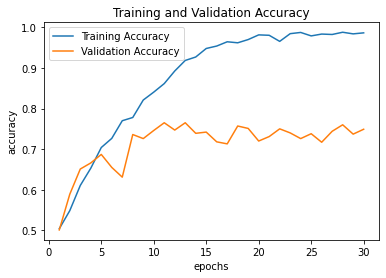

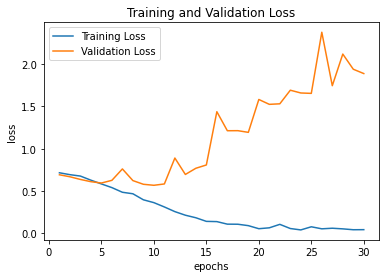

In [43]:
import matplotlib.pyplot as plt
epochs = range(1, 31)
plt.plot(epochs, trainin_history.history["accuracy"], label="Training Accuracy")
plt.plot(epochs, trainin_history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy")

plt.figure()
plt.plot(epochs, trainin_history.history["loss"], label="Training Loss")
plt.plot(epochs, trainin_history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation Loss")

plt.show()

In [45]:
#load the model that was saved
test_model = keras.models.load_model("cats_vs_dogs.keras")

In [50]:
test_loss, test_accuracy = test_model.evaluate(test_dataset)

63/63 [==============================] - 4s 53ms/step - loss: 0.5920 - accuracy: 0.7320


In [55]:
print(f"Testing accuracy: {test_accuracy: .4f}")

Testing accuracy:  0.7320


In [56]:
print(f"Testing loss: {test_loss: .3f}")

Testing loss:  0.592
